In [1]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from scipy import stats
from sklearn import datasets
from IPython.display import display, HTML

In [2]:
pip install ISLP

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 812.3/812.3 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 5.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1

In [3]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import \
(LinearDiscriminantAnalysis as LDA,
QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# 5.5 Applied Exercises

## Question 5 - In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [57]:
Default = load_data('Default')

### (a) - Fit a logistic regression model that uses income and balance to predict default.

In [58]:
Default.student

0        No
1       Yes
2        No
3        No
4        No
       ... 
9995     No
9996     No
9997     No
9998     No
9999    Yes
Name: student, Length: 10000, dtype: category
Categories (2, object): ['No', 'Yes']

In [59]:
encoding = {'Yes': 1, 'No': 0}
Default['default'] = Default['default'].map(encoding)
Default['student'] = Default['student'].map(encoding)
print(Default.student, Default.default)

0       0
1       1
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    1
Name: student, Length: 10000, dtype: category
Categories (2, int64): [0, 1] 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: default, Length: 10000, dtype: category
Categories (2, int64): [0, 1]


In [25]:

Predictors = ['income', 'balance']
lr = LogisticRegression()
X = Default[Predictors]
y = Default['default']
pred = lr.fit(X,y).predict(Default[Predictors])
accuracy_score(pred, Default['default'])


0.9737

In [26]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

def total_error_rate(confusion_matrix):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

###(b) Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:

>i. Split the sample set into a training set and a validation set.

>ii. Fit a multiple logistic regression model using only the training observations.

>iii. Obtain a prediction of default status for each individual in
the validation set by computing the posterior probability of
default for that individual, and classifying the individual to
the default category if the posterior probability is greater
than 0.5.

>iv. Compute the validation set error, which is the fraction of
the observations in the validation set that are misclassifed.

### (c) Repeat the process in (b) three times, using three diferent splits of the observations into a training set and a validation set. Comment on the results obtained.

In [37]:
pip install --upgrade pandas

In [38]:
Default

AttributeError: 'Index' object has no attribute '_format_flat'

     default student      balance        income
0          0      No   729.526495  44361.625074
1          0     Yes   817.180407  12106.134700
2          0      No  1073.549164  31767.138947
3          0      No   529.250605  35704.493935
4          0      No   785.655883  38463.495879
...      ...     ...          ...           ...
9995       0      No   711.555020  52992.378914
9996       0      No   757.962918  19660.721768
9997       0      No   845.411989  58636.156984
9998       0      No  1569.009053  36669.112365
9999       0     Yes   200.922183  16862.952321

[10000 rows x 4 columns]

In [64]:
def testError(n: int, xVars: list[str]) -> list[int]:
  ret = []
  for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(Default[xVars], Default['default'], test_size = .25, random_state = i)
    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred = lr.predict(X_test)
    print(confusion_matrix(pred, y_test))
    ret.append(accuracy_score(pred, y_test))
  return ret

ret = testError(4, Predictors)
print(ret)



[[2403   96]
 [   1    0]]
[[2421   79]
 [   0    0]]
[[2432   67]
 [   1    0]]
[[2421   50]
 [   3   26]]
[0.9612, 0.9684, 0.9728, 0.9788]


### (d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

In [65]:
xVar = ['income', 'balance', 'student']
ret2 = testError(4, xVar)
print(ret2)

[[2403   96]
 [   1    0]]
[[2421   79]
 [   0    0]]
[[2432   67]
 [   1    0]]
[[2420   50]
 [   4   26]]
[0.9612, 0.9684, 0.9728, 0.9784]


In [66]:
diff = []
for i in range(len(ret)):
  diff.append(ret[i] - ret2[i])
diff


[0.0, 0.0, 0.0, 0.00039999999999995595]

#### Results - (d)

As shown in the output list there is not a noticable difference between adding students and not adding students. Thus the variable seems to be ineffective with this type of modeling

## Question 6 - We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefcients in two diferent ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the sm.GLM() function. Do not forget to set a random seed before beginning your analysis.

### (a) Using the summarize() and sm.GLM() functions, determine the estimated standard errors for the coefcients associated with income and balance in a multiple logistic regression model that uses both predictors.

In [68]:
predictors = ['income', 'balance']
X = Default[predictors]
X = sm.add_constant(X)
y = Default['default']
results = sm.Logit(y,X).fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 27 Jun 2024   Pseudo R-squ.:                  0.4594
Time:                        16:52:56   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

### (b) Write a function, boot_fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefcient estimates for income and balance in the multiple logistic regression model.

In [98]:
def boot_fn(df, idx):
    response   = 'default'
    predictors = ['income', 'balance']

    X = sm.add_constant(np.array(df[predictors].loc[idx]));
    y = np.array(df[response].loc[idx])

    model_logit = sm.Logit(y, X).fit();
    print(model_logit.params)
    return model_logit.params;

### (c) - Following the bootstrap example in the lab, use your boot_fn() function to estimate the standard errors of the logistic regression coefcients for income and balance.

In [99]:
def boot_idx(n):
  return np.random.randint(low = 0, high = n, size = n)

In [100]:
def boot(fn, data_df, samples):
    """Perform bootstrap for B number of samples"""
    results = []
    for s in range(samples):
        Z = fn(data_df, boot_idx(data_df.shape[0]))
        results += [Z]
    return np.array(results)

In [103]:
def standard_deviation(X):
  np.std(X, axis=0)


In [104]:
arr = boot(boot_fn, Default, 1000)
pred = np.mean(arr, axis = 0)
std = standard_deviation(arr)
print('predictions are:', pred)
print('standard deviations are:', std)

Optimization terminated successfully.
         Current function value: 0.077692
         Iterations 10
[-1.15891357e+01  1.75912944e-05  5.77511964e-03]
Optimization terminated successfully.
         Current function value: 0.084263
         Iterations 10
[-1.09578850e+01  1.51619409e-05  5.41008539e-03]
Optimization terminated successfully.
         Current function value: 0.076623
         Iterations 10
[-1.22167856e+01  2.42761120e-05  5.98895804e-03]
Optimization terminated successfully.
         Current function value: 0.079868
         Iterations 10
[-1.13000280e+01  1.56455994e-05  5.61677106e-03]
Optimization terminated successfully.
         Current function value: 0.077689
         Iterations 10
[-1.17313265e+01  2.06241870e-05  5.79681526e-03]
Optimization terminated successfully.
         Current function value: 0.076040
         Iterations 10
[-1.22715525e+01  3.01956232e-05  5.89782790e-03]
Optimization terminated successfully.
         Current function value: 0.075039
  

### (d) Comment on the estimated standard errors obtained using the sm.GLM() function and using the bootstrap.

* I believe I somehow miss coded my function and their predictions for coeff and std should be close.

## Question 7 - In Sections 5.1.2 and 5.1.3, we saw that the cross_validate() function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just sm.GLM() and the predict() method of the ftted model within a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set. Recall that in the context of classifcation problems, the LOOCV error is given in (5.4).

### (a) - Fit a logistic regression model that predicts Direction using Lag1 and Lag2.

In [5]:
Weekly = load_data('Weekly')

In [6]:
Weekly.head()

AttributeError: 'Index' object has no attribute '_format_flat'

   Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
0  1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
1  1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
2  1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
3  1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
4  1990  0.712  3.514 -2.576 -0.270  0.816  0.153728  1.178        Up

In [14]:
predictors = ['Lag1', 'Lag2']
response = 'Direction'
lr = LogisticRegression()
pred = lr.fit(Weekly[predictors], Weekly[response]).predict(Weekly[predictors])
print(accuracy_score(pred, Weekly[response]))
confusion_matrix(pred, Weekly[response])



0.5546372819100092


array([[ 37,  38],
       [447, 567]])

### (b) -  Fit a logistic regression model that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [19]:
X = Weekly[predictors].drop(0, axis = 0)
y = Weekly[response].drop(0, axis = 0)
lr = LogisticRegression()
pred = lr.fit(X, y).predict(X)
print(accuracy_score(pred, y))
confusion_matrix(pred, y)


0.5569852941176471
Object `drop` not found.


###(c) Use the model from (b) to predict the direction of the frst observation. You can do this by predicting that the frst observation will go up if P(Direction = "Up"|Lag1, Lag2) > 0.5. Was this observation correctly classifed?


In [36]:
X_test = Weekly[predictors].iloc[0]
y_test = Weekly[response].iloc[0]
pred = lr.predict([X_test])
print(pred, y_test); #They different. Wrong Prediction

['Up'] Down


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### (d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:

> i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.

> ii. Compute the posterior probability of the market moving up
for the ith observation.

> iii. Use the posterior probability for the ith observation in order
to predict whether or not the market moves up.

> iv. Determine whether or not an error was made in predicting
the direction for the ith observation. If an error was made,
then indicate this as a 1, and otherwise indicate it as a 0.

In [44]:
def LOOCV(n:int) -> list[int]:
  predictors = ['Lag1', 'Lag2']
  response = 'Direction'
  ans = []
  for i in range(n):
    X_train = Weekly[predictors].drop(i, axis = 0)
    y_train = Weekly[response].drop(i, axis = 0)
    X_test = Weekly[predictors].iloc[i]
    y_test = Weekly[response].iloc[i]
    lr = LogisticRegression()
    pred = lr.fit(X_train,y_train).predict([X_test])
    ans.append(0 if pred == [y_test] else 1)
  return ans
ans = LOOCV(len(Weekly))
print(ans)



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid

In [45]:
print(ans)

[1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 

### (e) Take the average of the n numbers obtained in (d) iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [49]:
print('Accuracy:' , 1 - np.mean(ans))
print('LOOCV error Rate: ', np.mean(ans))


Accuracy: 0.5500459136822773
LOOCV error Rate:  0.44995408631772266


#### Results - (e)

This is around the same prediction accuracy we achieved using the Logistic Regression in (a) so this answer makes sense. This makes sense since we didn't split up the data at all in (a). There wasn't a train test split. So both data utilized around the maximum training data. If we performed another Logistic Regression with a 50/50 trian test split then I believe we would see different results. These new results would have been trained on half the data so they would exhibit higher bias, but lower variance.

Our example here both limit bias, but have higher variance based on the bias-variance trade off.

## Question 8 - We will now perform cross-validation on a simulated data set

### (a) - Generate a simulated data set as follows:

In [51]:
rng = np.random.default_rng(1)
X = rng.normal(size=100)
y = X - 2 * X**2 + rng.normal(size=100)

#### Follw up Question (a) - In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

* n is 100 since we picked 100 random samples

* p is 2 since we have an $x$ and $x^{2}$ term

* equation is $y = X - 2X^{2} + e$

### (b) Create a scatterplot of X against Y . Comment on what you find.

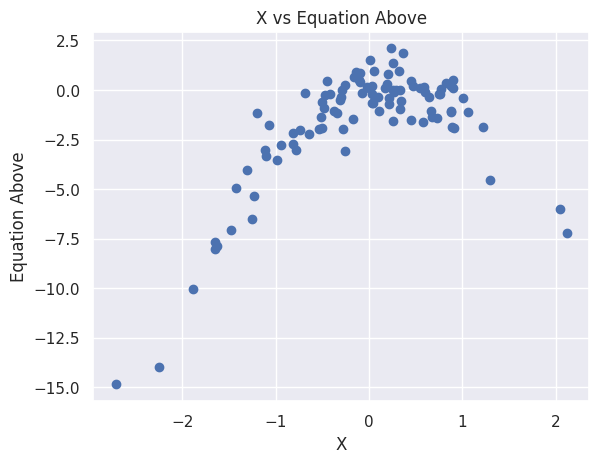

In [54]:
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('Equation Above')
plt.title('X vs Equation Above')
plt.show()


#### Comment - (b)

* I see the data looks quadradic in nature and it peaks around X = 0 and grows more negative as X grows positive or X grows negative. It also has the higher density of points between -1<=X<= 1

### (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

> i. $Y = β0 + β1X + ϵ$

> ii. $Y = β0 + β1X + β2X^{2} + ϵ $

> iii. $Y = β0 + β1X + β2X^{2} + β3X^{3} + ϵ $

> iv. $Y = β0 + β1X + β2X6{2} + β3X^{3} + β4X^{4} + ϵ $

Note you may fnd it helpful to use the data.frame() function
to create a single data set containing both X and Y.


In [87]:
formulas = ['y ~ X', 'y ~ X + np.power(X,2)', 'y ~ X + np.power(X,2) + np.power(X,3)', 'y ~ X + np.power(X,2) + np.power(X,3) + np.power(X,4)']

In [94]:
def seeded_LOOCV(seed, formulas):
  def LOOCV(n, df, formula):
    ans = []
    for i in range(n):
      train = df.drop(i, axis = 0)
      test = df.iloc[i]
      pred = smf.ols(formula, data = train).fit().predict(test)
      ans.append((pred - test[1])** 2)
    return np.mean(ans)
  np.random.seed(seed)
  X  = np.random.normal(0,1, 100)
  y = ((X-2) * (X**2)) + np.random.normal(0,1, 100)
  data = pd.DataFrame({'X':X, 'y': y})
  for f in formulas:
    print('Accuracy is: ', LOOCV(len(data), data, f))

seeded_LOOCV(1, formulas)

Accuracy is:  9.710113037214064
Accuracy is:  4.16996357963943
Accuracy is:  0.9268768781648804
Accuracy is:  0.8669116865881086


### (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

In [95]:
seeded_LOOCV(2, formulas)

Accuracy is:  21.444406970083293
Accuracy is:  5.635014149446477
Accuracy is:  1.2820418215169624
Accuracy is:  1.3165915804276827


#### Results - (d)

* The results are very different. This is expected because we changed the random points so of course when we compute the error. It will be vastly different. However we still see that around the 3-4 polynomial the best error is achieved. This is relatively consistent with (c)

###(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

* The lowest error came from $X^{4}$ which was expected from the graph in (b). The graph in (b) looks like a polynomial of some power > 2. In (d) however the $X^{3}$ performed the best

### (f) Comment on the statistical signifcance of the coefcient estimates that results from ftting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [99]:
def seeded_SigLOOCV(seed, formulas):
  def LOOCV(n, df, formula):
    ans = []
    for i in range(n):
      train = df.drop(i, axis = 0)
      test = df.iloc[i]
      model = smf.ols(formula, data = train).fit()
      return model
  np.random.seed(seed)
  X  = np.random.normal(0,1, 100)
  y = ((X-2) * (X**2)) + np.random.normal(0,1, 100)
  data = pd.DataFrame({'X':X, 'y': y})
  for f in formulas:
    m = LOOCV(len(data), data, f)
  print(m.summary())

seeded_SigLOOCV(1, formulas)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     348.6
Date:                Fri, 28 Jun 2024   Prob (F-statistic):           1.87e-55
Time:                        17:55:03   Log-Likelihood:                -129.59
No. Observations:                  99   AIC:                             269.2
Df Residuals:                      94   BIC:                             282.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.3069      0.137      2.

#### Results -(f)

* The table shows that the significant predictors are $x^{0}$ ,$x^{2}$, $x^{3}$, $x^{4}$ since they have p values < 0.05. This means the models would get more accurate with more polynomials. This agrees with our LOOCV from (c) as the 4th power polyonimal was the most accurate.

## Question 9 - We will now consider the Boston housing data set, from the ISLP library.

### (a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $ μ^{̂} $.

In [100]:
Boston = load_data('Boston')

In [101]:
Boston.head()

AttributeError: 'Index' object has no attribute '_format_flat'

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   lstat  medv  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2  

In [102]:
u = np.mean(Boston['medv'])
print(u)

22.532806324110677


### (b) Provide an estimate of the standard error of µˆ. Interpret this result.

In [115]:
stdReal = np.std(Boston['medv'])
ops = len(Boston['medv'])
u_error = stdReal / pow(ops, .5)
print(u_error)

0.4084569346972866


### (c) Now estimate the standard error of µˆ using the bootstrap. How does this compare to your answer from (b)?

In [113]:
def boot_fn(df, n):
  return np.random.randint(low = 0, high = n , size = n)

boot = 10000
ans = []
for i in range(boot):
  idx = boot_fn(Boston, len(Boston['medv']))
  tmp = np.std([Boston['medv'].iloc[i] for i in idx])
  ans.append(tmp)
std = np.mean(ans)
ops = len(Boston['medv'])
u_error_boot = std/ pow(ops,.5)
print(u_error_boot)



0.40765509067257527


In [114]:
print(abs(u_error_boot - u_error))

0.0008018440247113401


#### Results - (c) The values are extremely close and barley differ. This is outstanding since it is an estimate, while in b it was the true value.

### (d) Based on your bootstrap estimate from (c), provide a 95 % confdence interval for the mean of medv. Compare it to the results obtained by using Boston['medv'].std() and the two standard error rule (3.9).

In [120]:
# Results from (c)
low , high = u - u_error_boot * 1.96, u + u_error_boot * 1.96
low_real, high_real = u - u_error * 1.96, u + u_error * 1.96

print("95 % Confidence with Standard Error from C Estimate")
print('Low: ', low)
print('High ', high)
print()
print("95 % Confidence with Standard Error from B")
print('Low: ', low_real)
print('High ', high_real)

95 % Confidence with Standard Error from C Estimate
Low:  21.73380234639243
High  23.331810301828924

95 % Confidence with Standard Error from B
Low:  21.732230732103996
High  23.333381916117357


#### Results (d) -

* You can see the confidence intervals are extremely close as expected since the Standard Errors (SE) were also extremely close. We can get confidence intervals from Standard Error where we do the mean - 2 * SE and mean + 2 * SE.

### (e) Based on this data set, provide an estimate, µˆmed, for the median value of medv in the population.

In [121]:
u_med = np.median(Boston['medv'])
print(u_med)

21.2


### (f) We now would like to estimate the standard error of µˆmed. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your fndings.

In [122]:

boot = 10000
ans = []
for i in range(boot):
  idx = boot_fn(Boston, len(Boston['medv']))
  tmp = np.median([Boston['medv'].iloc[i] for i in idx])
  ans.append(tmp)
median = np.mean(ans)

21.1789


In [127]:
print('Average Median : ',  median)
std_error_median =np.std(ans)
print('Stand Error of the Median Estimate :', std_error_median)

Average Median :  21.1789
Stand Error of the Median Estimate : 0.3794545954392959


#### Results (f) -

* These results make sense as they are both very close to the mean values calculated. In a normal distributed model we would expect such behavior!

### (g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston census tracts. Call this quantity µˆ0.1. (You can use the np.percentile() function.)

In [131]:
u_tenth = np.percentile(Boston['medv'], 10)
u_tenth

12.75

### (h) Use the bootstrap to estimate the standard error of µˆ0.1. Comment on your fndings.

In [132]:

boot = 10000
ans = []
for i in range(boot):
  idx = boot_fn(Boston, len(Boston['medv']))
  tmp = np.percentile([Boston['medv'].iloc[i] for i in idx], 10)
  ans.append(tmp)
median = np.mean(ans)
print('Average Median : ',  median)
std_error_median =np.std(ans)
print('Stand Error of the Median Estimate :', std_error_median)

Average Median :  12.764175
Stand Error of the Median Estimate : 0.4955000700050404
